In [1]:
from mnist import MNIST
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

In [2]:
# load the MNIST dataset
(train_x, train_y), (test_x, test_y) = load_data()

In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
train_y.shape

(60000,)

In [5]:
test_x.shape

(10000, 28, 28)

In [6]:
test_y.shape

(10000,)

In [7]:
# reshape the training and testing data
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1],
train_x.shape[2],1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [8]:
# normalizing
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

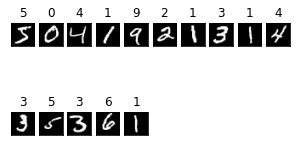

In [9]:
import numpy as np
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,3))
# plot first few images
for i in range (15):
    # define subplot
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    # plot raw pixel data
    ax.imshow(np.squeeze(train_x[i]), cmap='gray')
    ax.set_title(train_y[i])

In [10]:
# determine the shape of the input images
img_shape = train_x.shape[1:]
print(img_shape)

(28, 28, 1)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

In [12]:
#use these two lines when you use tensorflow models.
#This woud avoid several warnings and errors
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [13]:
model = Sequential([
    #model expects rows of feature data with shape input_shape using img_shape

    layers.InputLayer(input_shape=(img_shape)),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),  #hidden layer
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(48, (3, 3), padding='same', activation='relu'),  #hidden layer
    layers.AveragePooling2D((2, 2)),
    
    layers.Flatten(), #create array of pixels of single dimension since Dense takes 1D input
    
    layers.Dense(500, activation='relu'),  #hidden layer
    
    #no activation function is used inside output layer
# Use Dense for the output layer. This layer is to be activated by softmax function.
    layers.Dense(10, activation='softmax')  #output layer
])

2022-03-22 04:56:08.781112: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        13872     
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 48)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 500)               1

In [15]:
#the from_logits=True attribute informs the loss function that the output values 
#generated by the model are not normalized
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
train_x.shape

(60000, 28, 28, 1)

In [17]:
train_y.shape

(60000,)

In [18]:
# training the model for 5 epochs
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
   3/1875 [..............................] - ETA: 1:37 - loss: 2.2912 - accuracy: 0.1458

/Users/jiyeyu/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 97s 52ms/step - loss: 0.1347 - accuracy: 0.9586
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0166 - accuracy: 0.9949


In [19]:
#finding accuracy of the model
score = model.evaluate(test_x, test_y, verbose=2)

313/313 - 4s - loss: 0.0259 - accuracy: 0.9914 - 4s/epoch - 14ms/step


In [20]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025926796719431877
Test accuracy: 0.9914000034332275


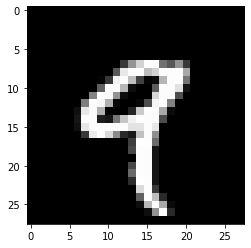

In [21]:
# Pick the 5th image from the dataset. it is a 9
image = train_x[4]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [22]:
from numpy import unique, argmax
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 9


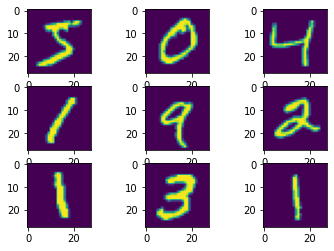

In [23]:
from matplotlib import pyplot
# plot first few images
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# plot raw pixel data
    pyplot.imshow(train_x[i])
# show the figure
pyplot.show()

In [24]:
test_x.shape

(10000, 28, 28, 1)

In [25]:
test_y.shape

(10000,)